C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


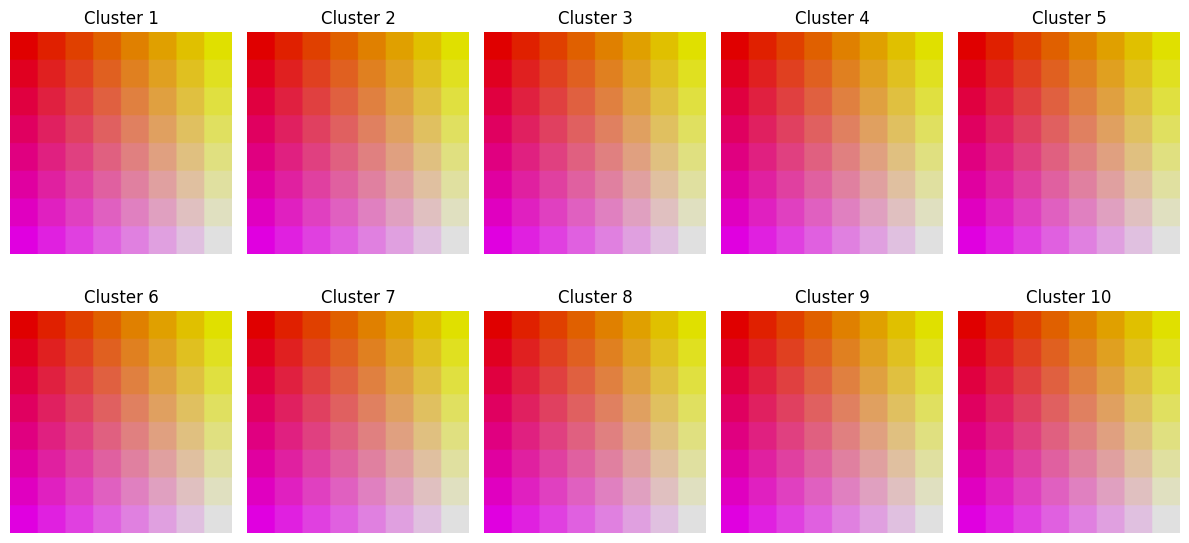

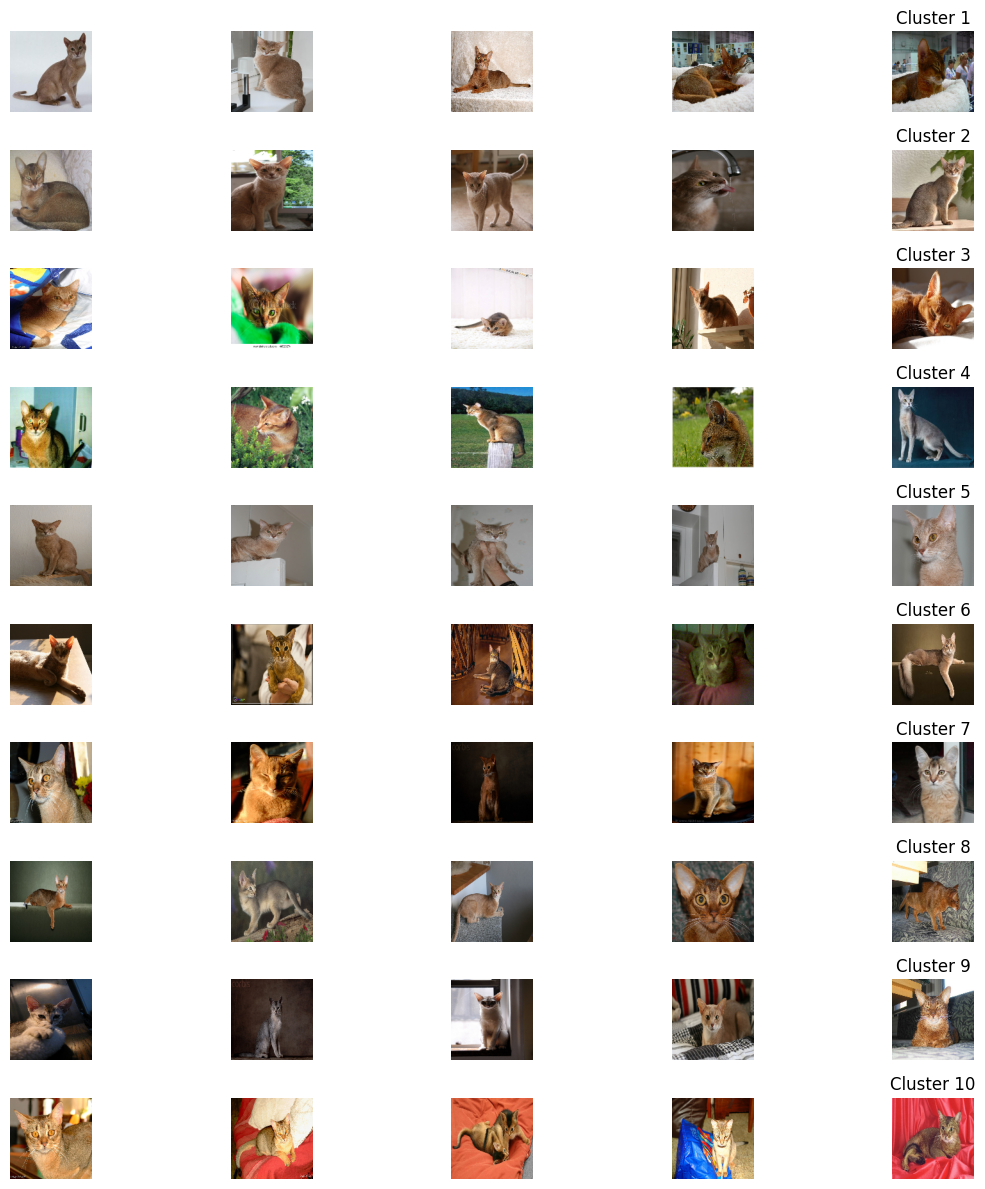

In [4]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Step 1: Load Images
def load_images_from_folder(folder, max_images=100):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename), cv2.IMREAD_COLOR)
        if img is not None:
            img = cv2.resize(img, (128, 128))  # Resize to a smaller size for faster processing
            images.append(img.flatten())  # Flatten the image for K-means
            if len(images) >= max_images:  # Limit the number of images loaded
                break
    return np.array(images)

# Specify the path to the Stanford Cars dataset (train or test images)
train_folder = 'images'
images = load_images_from_folder(train_folder, max_images=1000)

# Step 2: Feature Extraction (Using color histogram as a feature)
def extract_color_histogram(images):
    histograms = []
    for img in images:
        # Convert the flattened image back to BGR format for histogram calculation
        img = img.reshape(128, 128, 3)
        hist = cv2.calcHist([img], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
        hist = cv2.normalize(hist, hist).flatten()
        histograms.append(hist)
    return np.array(histograms)

# Extract color histograms as features
features = extract_color_histogram(images)

# Step 3: Apply K-means Clustering
num_clusters = 10  # Specify the number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(features)

# Step 4: Visualize Cluster Centers
def plot_cluster_centers(kmeans):
    centers = kmeans.cluster_centers_
    plt.figure(figsize=(12, 6))
    for i in range(len(centers)):
        center = centers[i].reshape(8, 8, 8)  # Reshape to a 3D histogram
        center_image = np.zeros((128, 128, 3), dtype=np.uint8)
        for r in range(8):
            for g in range(8):
                for b in range(8):
                    color = (b * 32, g * 32, r * 32)  # Scale back to color space
                    count = int(center[r, g, b] * 1000)  # Approximate count for visualization
                    center_image[r * 16:(r + 1) * 16, g * 16:(g + 1) * 16] = color
        plt.subplot(2, 5, i + 1)
        plt.imshow(center_image)
        plt.axis('off')
        plt.title(f'Cluster {i + 1}')
    plt.tight_layout()
    plt.show()

# Visualize cluster centers
plot_cluster_centers(kmeans)

# Step 5: Visualize Clustered Images
def visualize_clustered_images(images, kmeans):
    clustered_images = [[] for _ in range(num_clusters)]
    labels = kmeans.labels_

    for img, label in zip(images, labels):
        clustered_images[label].append(img.reshape(128, 128, 3))

    plt.figure(figsize=(12, 12))
    for i, cluster in enumerate(clustered_images):
        for j, img in enumerate(cluster[:5]):  # Show first 5 images per cluster
            plt.subplot(num_clusters, 5, i * 5 + j + 1)
            plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
            plt.axis('off')
        plt.title(f'Cluster {i + 1}')
    plt.tight_layout()
    plt.show()

# Visualize the clustered images
visualize_clustered_images(images, kmeans)